# KNN Model Grid Search

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Set-up-Model-and-Gridsearch:" data-toc-modified-id="Set-up-Model-and-Gridsearch:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up Model and Gridsearch:</a></span></li><li><span><a href="#Run-the-Gridsearch:" data-toc-modified-id="Run-the-Gridsearch:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run the Gridsearch:</a></span></li><li><span><a href="#Save-the-Gridsearch:" data-toc-modified-id="Save-the-Gridsearch:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the Gridsearch:</a></span></li><li><span><a href="#Analyse-Gridsearch-Results:" data-toc-modified-id="Analyse-Gridsearch-Results:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyse Gridsearch Results:</a></span></li><li><span><a href="#Analyse-Classification-Scores:" data-toc-modified-id="Analyse-Classification-Scores:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse Classification Scores:</a></span></li></ul></div>

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scikitplot as skplt

### Import Data:

In [3]:
# Filepaths / names:
y1_train_file = 'y1_train_clean_processed.csv'
y1_test_file = 'y1_test_clean_processed.csv'
X1_train_file = 'X1_train_clean_processed.csv'
X1_test_file = 'X1_test_clean_processed.csv'

In [4]:
y1_train = pd.read_csv(y1_train_file)

In [5]:
y1_test = pd.read_csv(y1_test_file)

In [6]:
X1_train = pd.read_csv(X1_train_file)

In [7]:
X1_test = pd.read_csv(X1_test_file)

### Set up Model and Gridsearch:

In [8]:
model3 = KNeighborsClassifier(leaf_size = 100)

In [9]:
params3 = {'n_neighbors': [5, 7, 9, 11, 13, 15, 20, 25, 40, 50],
           'weights': ['uniform', 'distance'],
           'metric': ['euclidean', 'manhattan']}

In [10]:
gs_model3 = GridSearchCV(estimator=model3,
                   param_grid=params3,
                   cv=5,
                   scoring='f1_macro',
                   n_jobs=-2,
                   verbose=6,
                   return_train_score=True)

### Run the Gridsearch:

In [11]:
gs_model3.fit(X1_train, y1_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-2)]: Done  99 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed: 383.7min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed: 444.4min finished
/home/ec2-user/exit/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(leaf_size=100), n_jobs=-2,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 20, 25, 40, 50],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1_macro', verbose=6)

### Save the Gridsearch:

In [13]:
joblib.dump(gs_model3, 'KNN_Grid_Search_3.jlib')

['KNN_Grid_Search_3.jlib']

### Analyse Gridsearch Results:

In [14]:
print(gs_model3.best_estimator_)
print(gs_model3.best_score_)
print(gs_model3.score(X1_train, y1_train))
print(gs_model3.score(X1_test, y1_test))

KNeighborsClassifier(leaf_size=100, metric='euclidean', n_neighbors=25,
                     weights='distance')
0.8296278729328608
1.0
0.830437297706109


In [15]:
gs_model3.best_params_

{'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}

### Analyse Classification Scores:

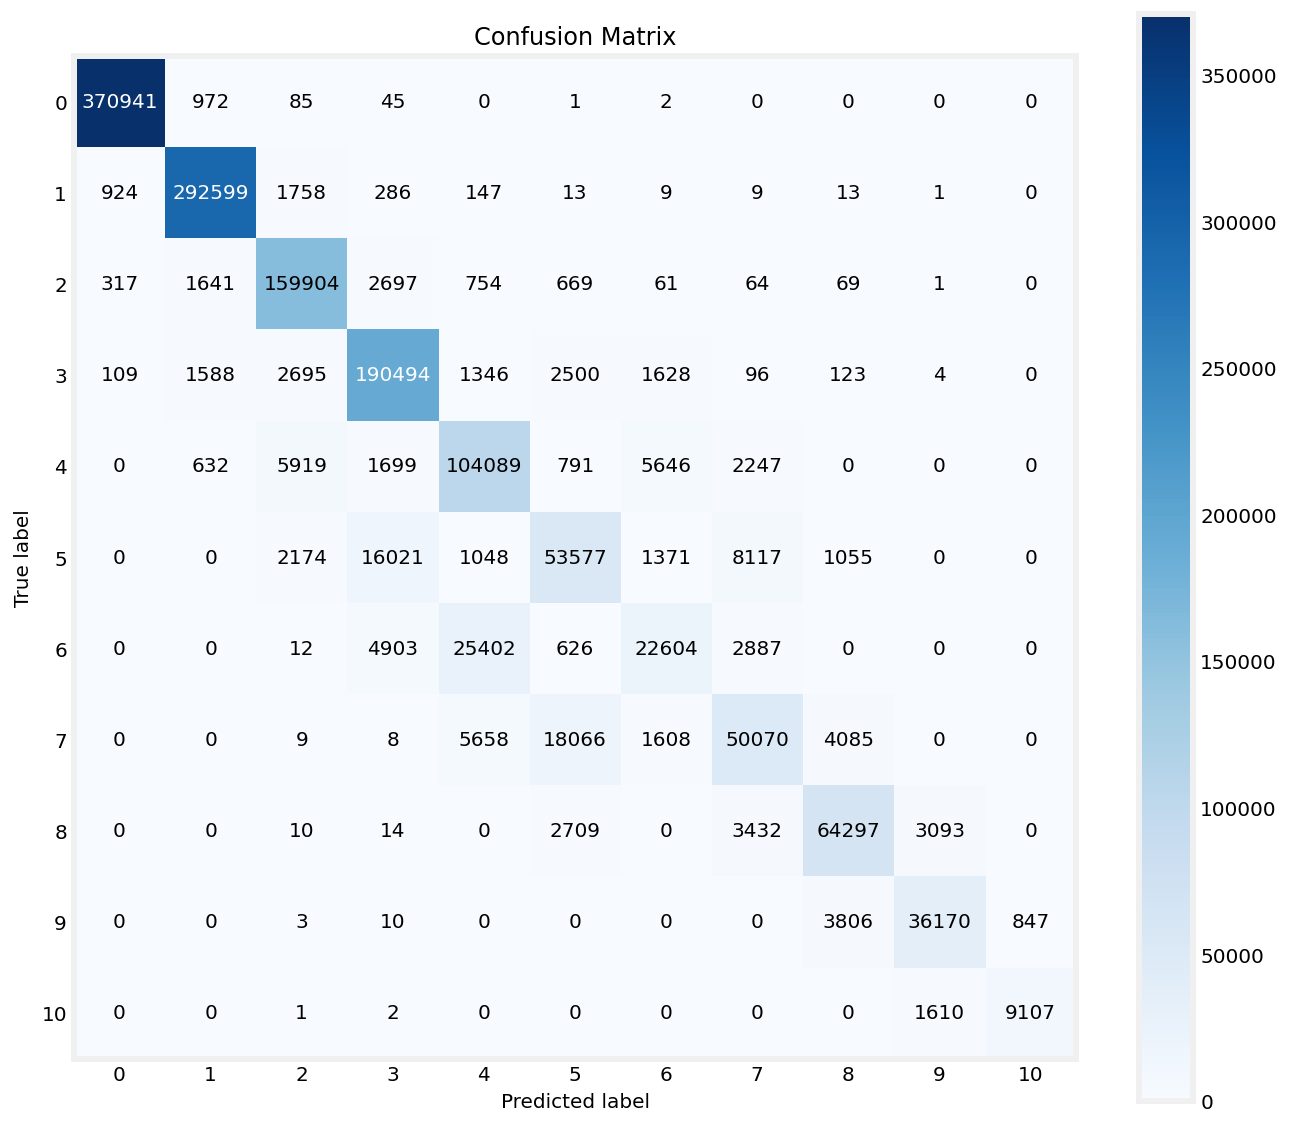

In [16]:
# Confusion Matrix
best_KNN = gs_model3.best_estimator_
predictions_test3 = best_KNN.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test,predictions_test3,labels=[0,1,2,3,4,5,6,7,8,9,10],figsize=(10,10))
plt.show()

In [17]:
# Cross Validation Score
cvs3 = cross_val_score(best_KNN, X1_test, y1_test, cv=5)
print(cvs3.mean())

/home/ec2-user/exit/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/exit/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/exit/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ec2-user/exit/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarnin

0.9005433333333333


In [18]:
# Accuracy, Precision and Recall
predictions_train3 = best_KNN.predict(X1_train)

print(classification_report(y1_train, predictions_train3))
print(classification_report(y1_test, predictions_test3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    868106
           1       1.00      1.00      1.00    690106
           2       1.00      1.00      1.00    387747
           3       1.00      1.00      1.00    468026
           4       1.00      1.00      1.00    282387
           5       1.00      1.00      1.00    194514
           6       1.00      1.00      1.00    131678
           7       1.00      1.00      1.00    185511
           8       1.00      1.00      1.00    171628
           9       1.00      1.00      1.00     95284
          10       1.00      1.00      1.00     25013

    accuracy                           1.00   3500000
   macro avg       1.00      1.00      1.00   3500000
weighted avg       1.00      1.00      1.00   3500000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    372046
           1       0.98      0.99      0.99    295759
           2       0.93 

In [19]:
# Precision Recall and ROC Curves
probabilities3_train = best_KNN.predict_proba(X1_train)
probabilities3_test = best_KNN.predict_proba(X1_test)

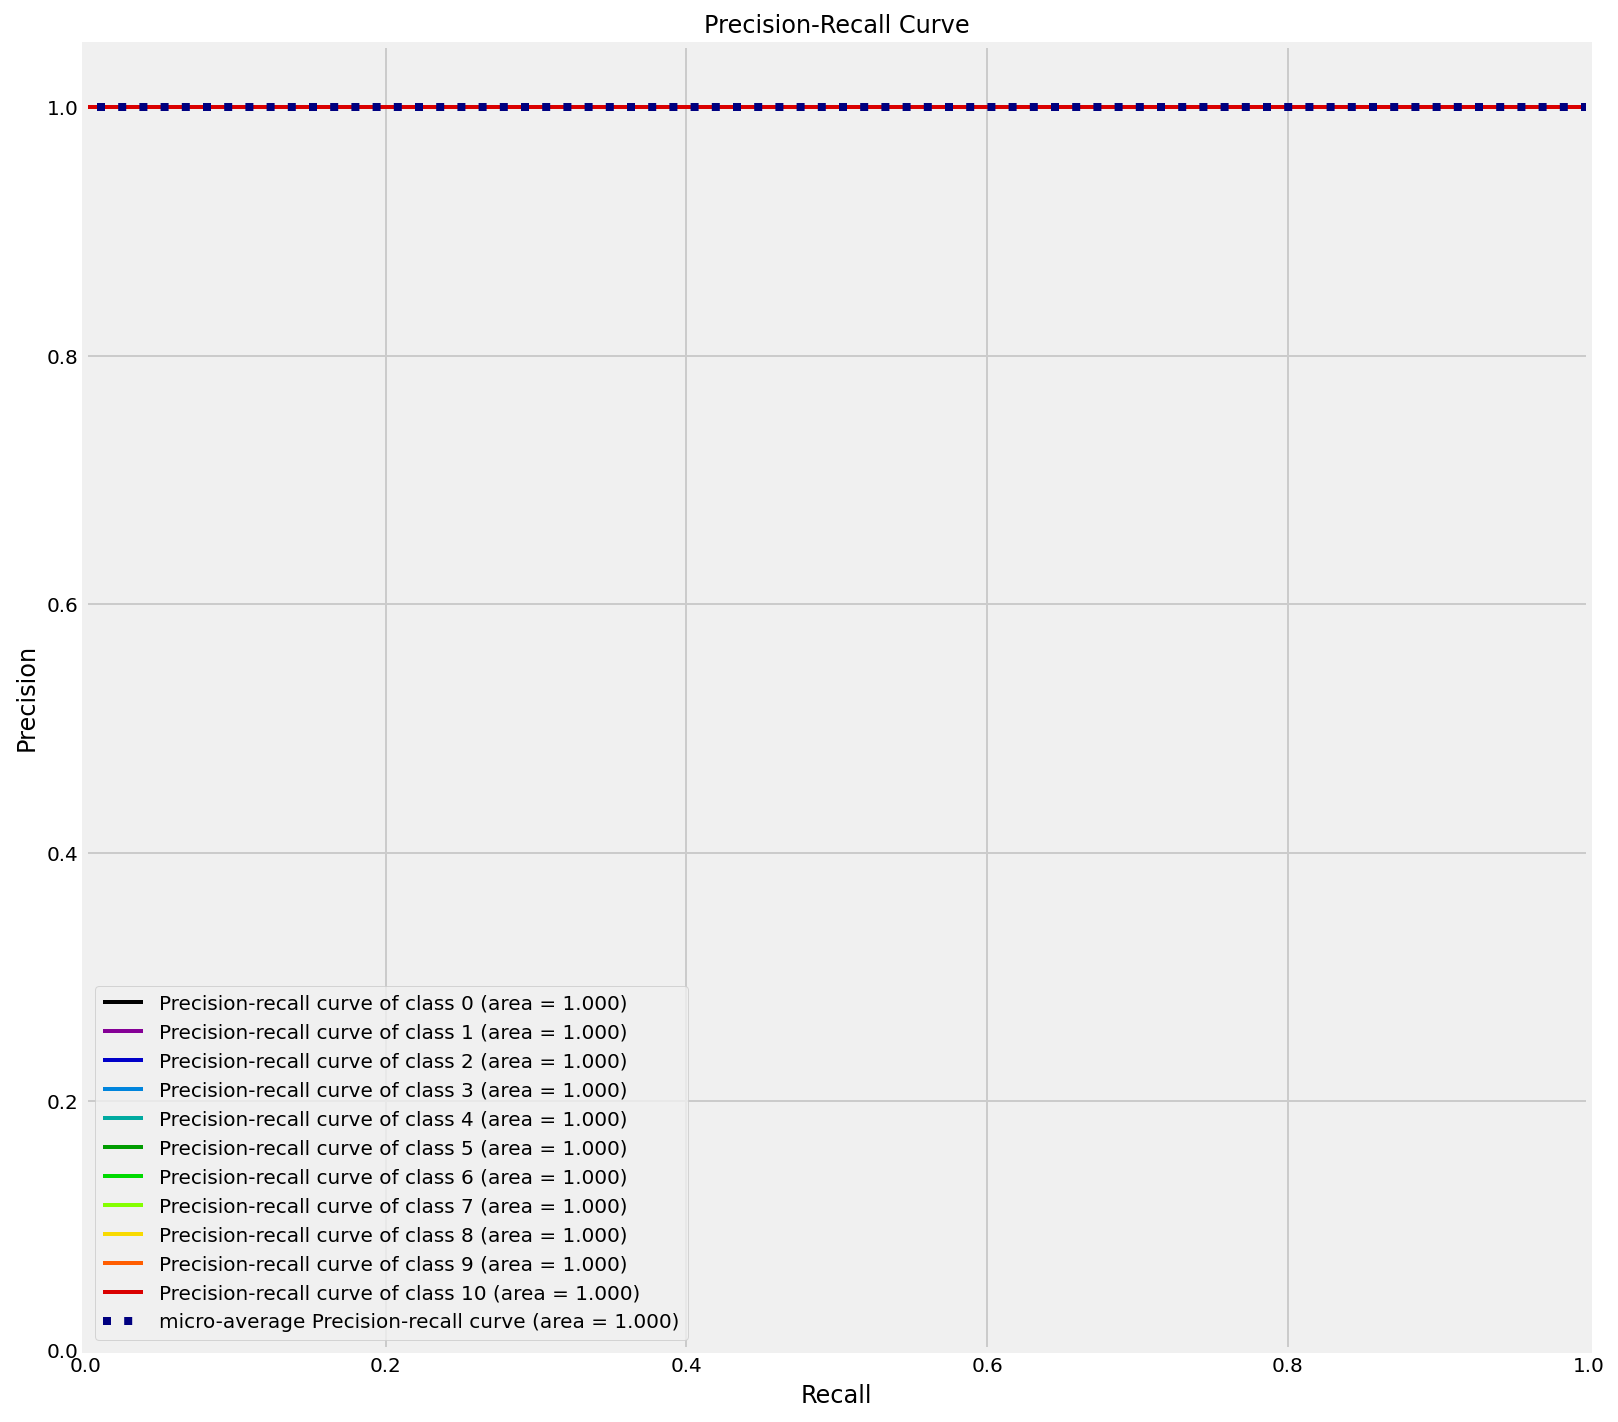

In [20]:
skplt.metrics.plot_precision_recall(y1_train, probabilities3_train,figsize=(12,12))
plt.show()

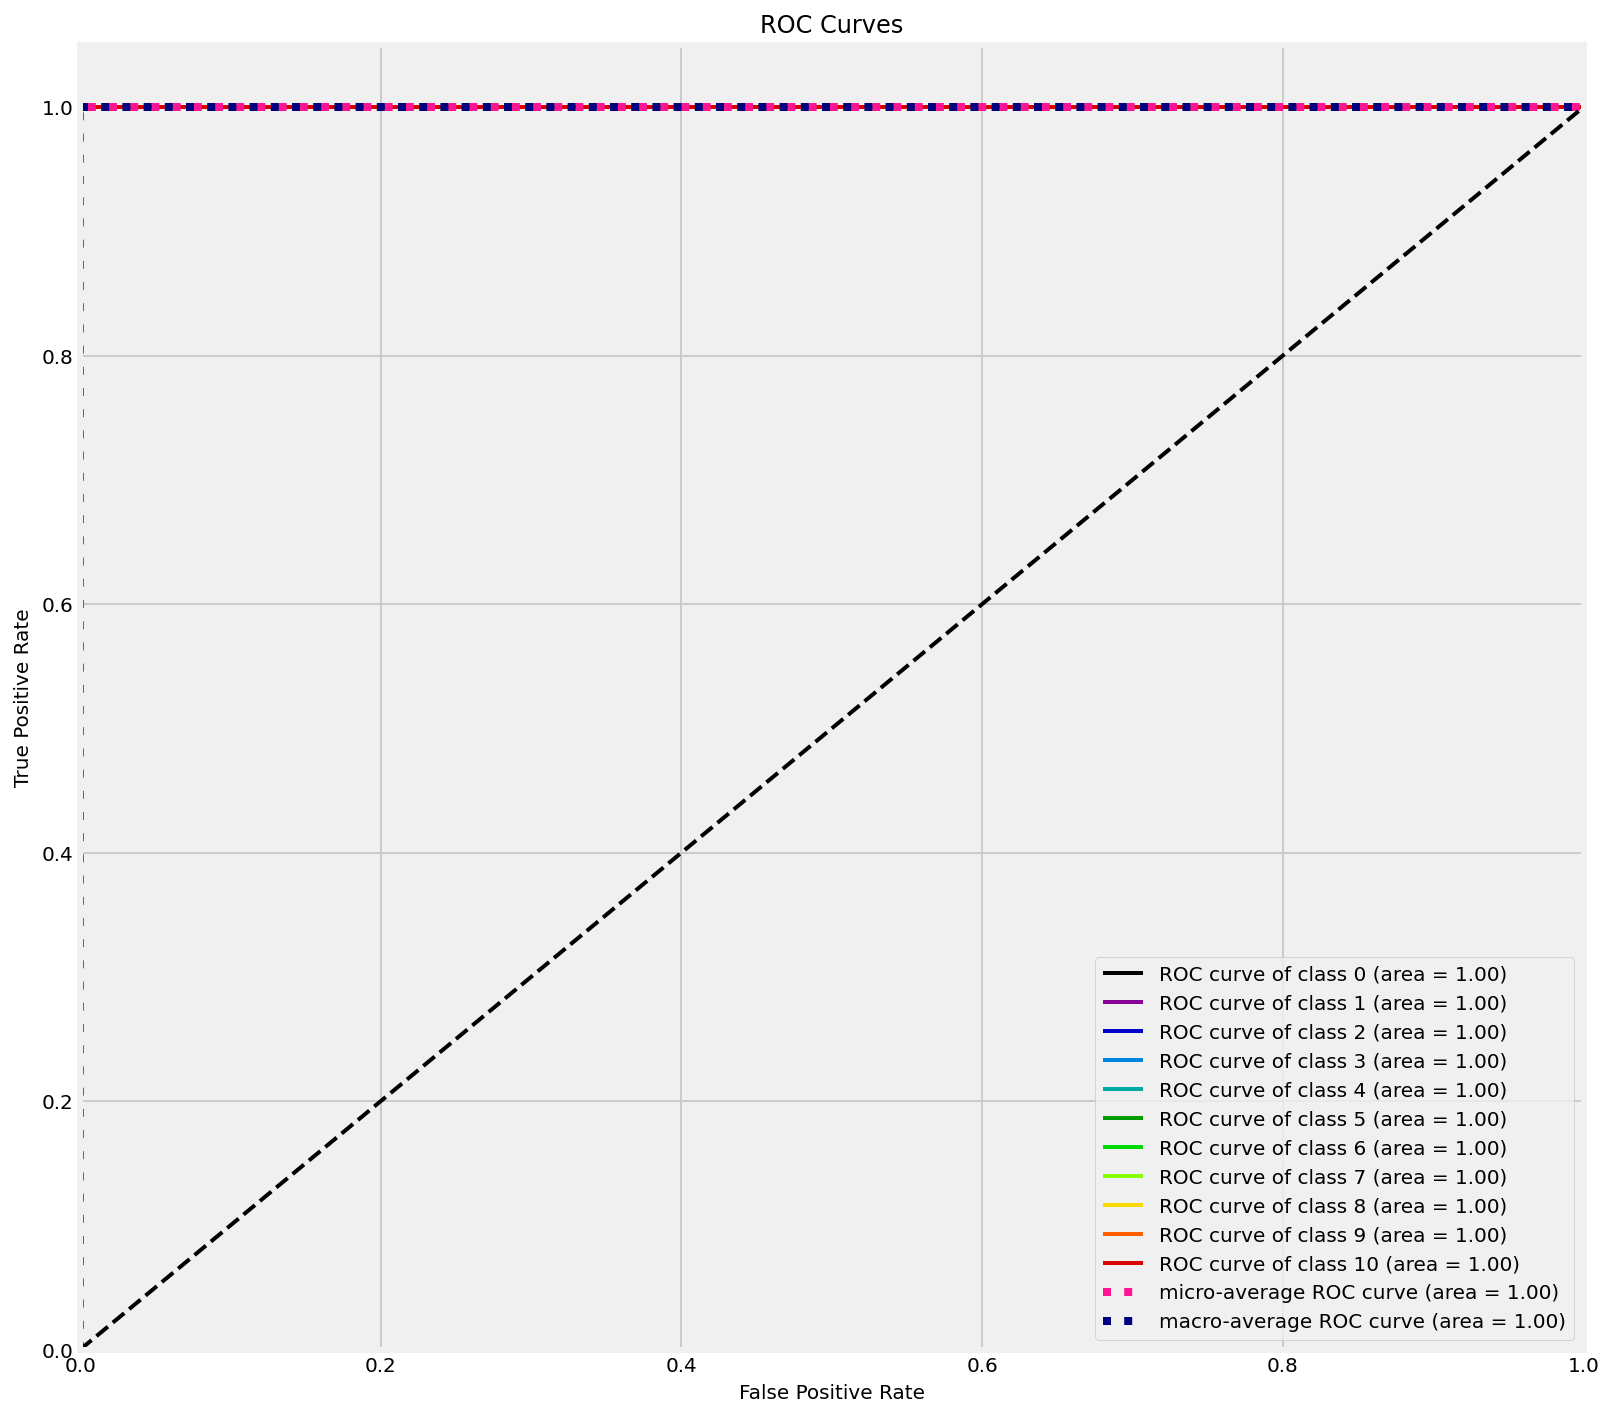

In [21]:
skplt.metrics.plot_roc(y1_train, probabilities3_train,figsize=(12,12))
plt.show()

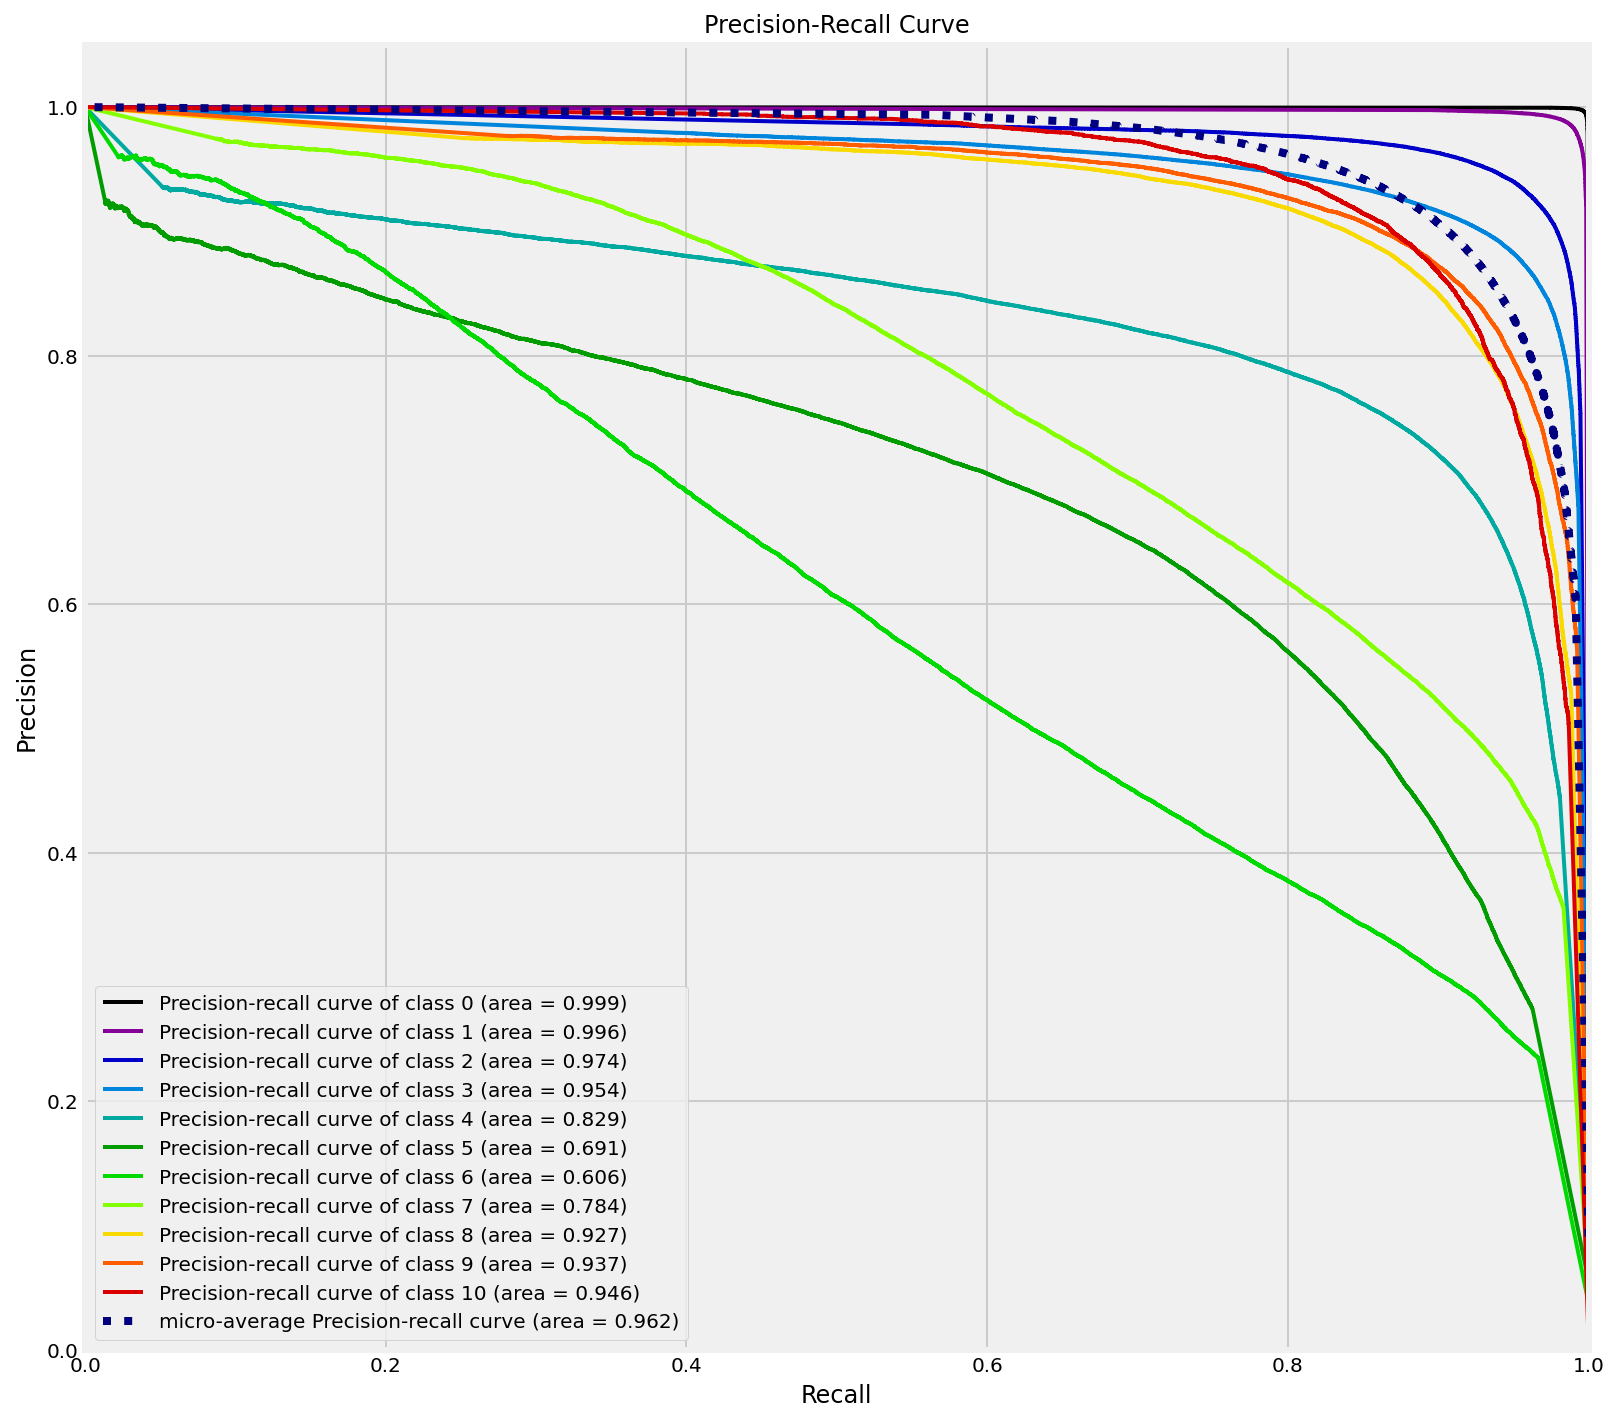

In [22]:
skplt.metrics.plot_precision_recall(y1_test, probabilities3_test,figsize=(12,12))
plt.show()

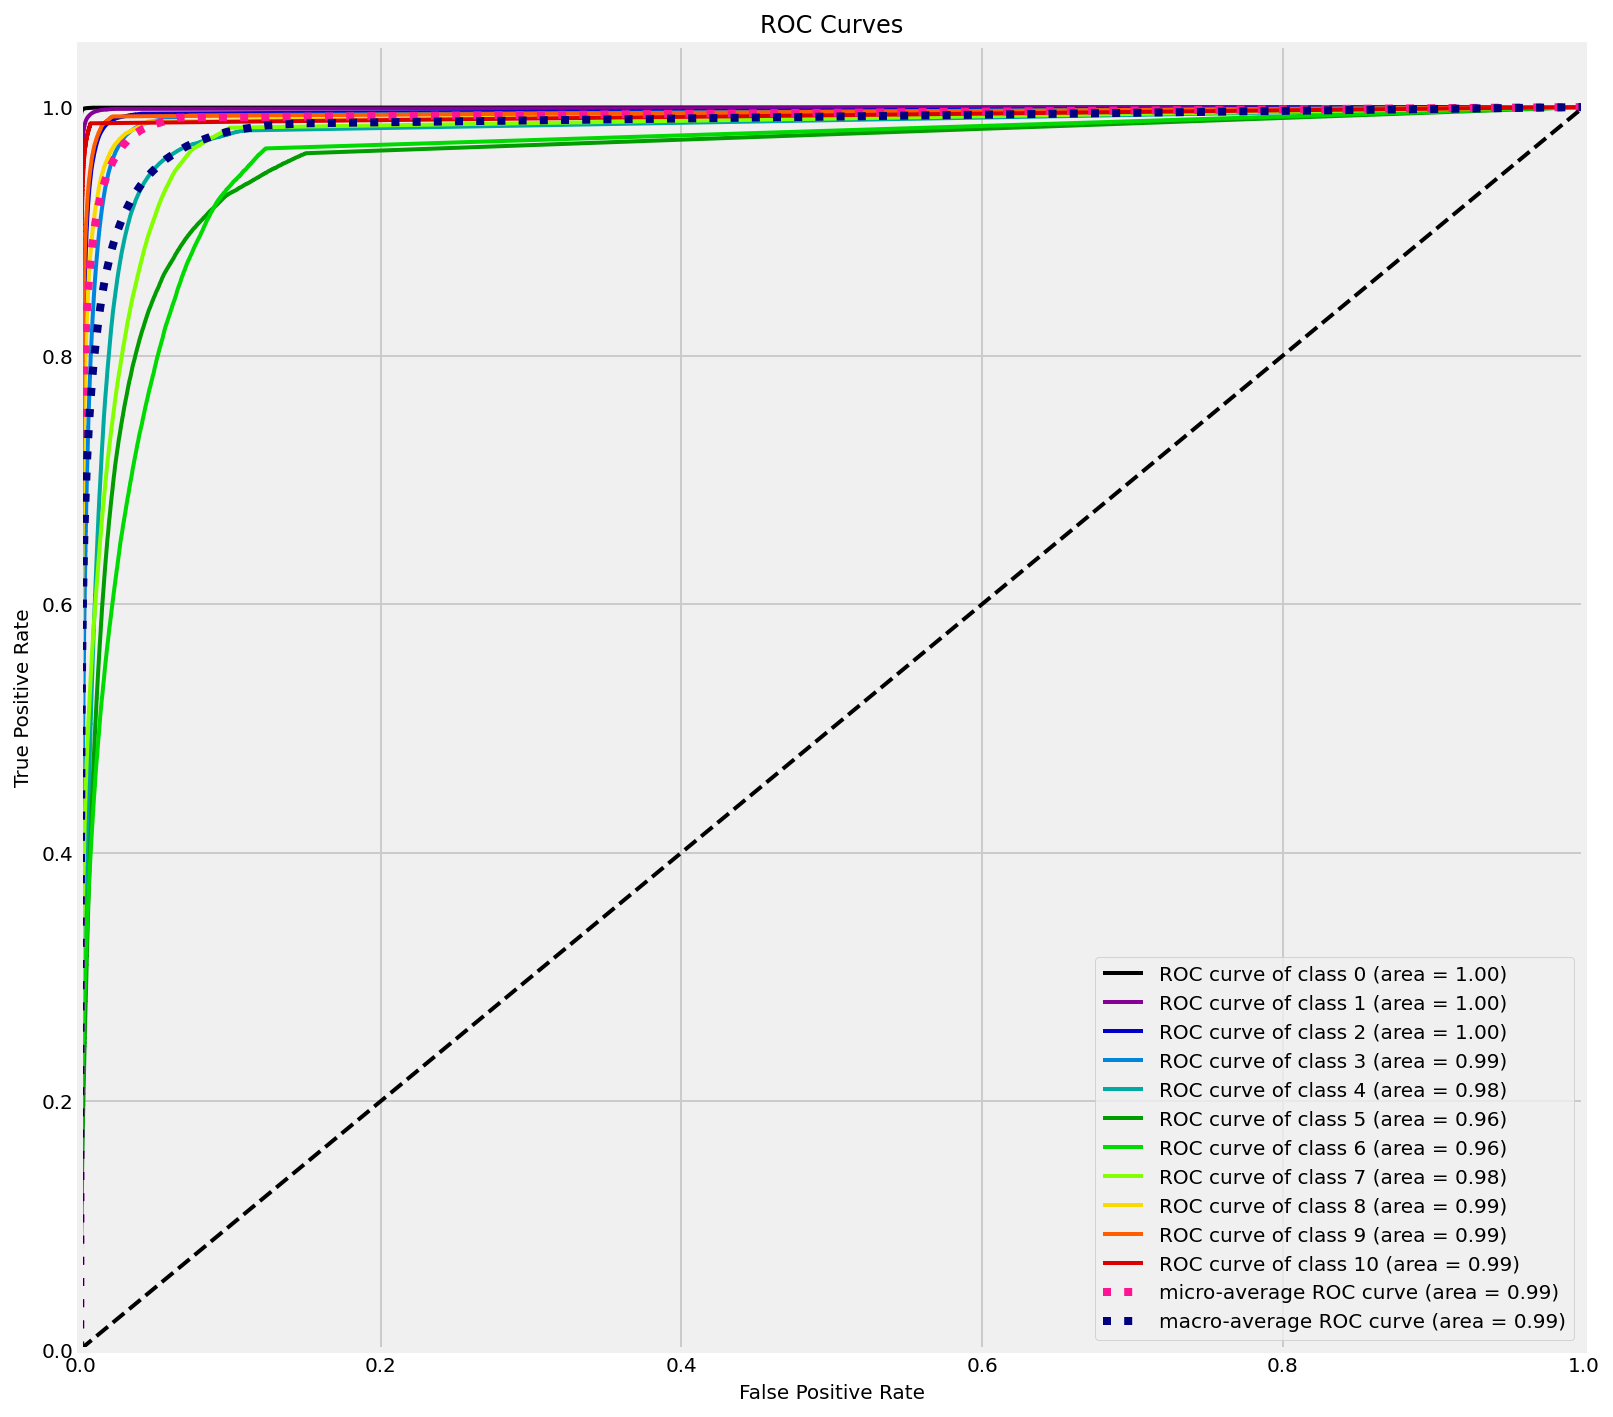

In [23]:
skplt.metrics.plot_roc(y1_test, probabilities3_test,figsize=(12,12))
plt.show()